# # For Text Mining assignment
ONE:
1) Perform sentimental analysis on the Elon-musk tweets (Exlon-musk.csv)

In [1]:
## Import the file
import pandas as pd
df= pd.read_csv("D:/Shiva Data Science/ExcelR Assignments/Text Mining/Elon_musk.csv", encoding='latin1')
df

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [2]:
Stop_Words = pd.read_csv("D:/Shiva Data Science/ExcelR Assignments/Text Mining/stop.txt",error_bad_lines=False)
Stop_Words

C:\Users\91879\AppData\Local\Temp\ipykernel_14260\1707214013.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  Stop_Words = pd.read_csv("D:/Shiva Data Science/ExcelR Assignments/Text Mining/stop.txt",error_bad_lines=False)


,a
0,a's
1,able
2,about
3,above
4,according
...,...
565,yours
566,yourself
567,yourselves
568,z


# sentimental analysis

In [3]:
# cleaning the tweets
one_tweet = df.iloc[5]['Text']
one_tweet


'Happy New Year of the Ox! https://t.co/9WFKMYu2oj'

In [4]:
def TweetCleaning(tweets):
    Cleantweet=re.sub(r"@[a-zA-Z0-9]+"," ",tweets)
    Cleantweet=re.sub(r"#[a-zA-Z0-9]+"," ",Cleantweet)
    Cleantweet=''.join(word for word in Cleantweet.split() if word not in Stop_Words)
    return Cleantweet

In [5]:
def calPolarity(tweets):
    return TextBlob(tweets).sentiment.polarity

In [6]:
def calSubjectivity(tweets):
    return TextBlob(tweets).sentiment.subjectivity

In [7]:
def segmentation(tweets):
    if tweets > 0:
        return "positive"
    elif tweets == 0:
        return "neutral"
    else:
        return "negative"

In [8]:
import re
from textblob import TextBlob

df["Cleanedtweets"]=df["Text"].apply(TweetCleaning)
df["Cleanedtweets"]
df["polarity"]=df["Cleanedtweets"].apply(calPolarity)
df["polarity"]
df["subjectivity"]=df["Cleanedtweets"].apply(calSubjectivity)
df["subjectivity"]
df["segmentation"]=df["polarity"].apply(segmentation)
df["segmentation"]

0       neutral
1       neutral
2       neutral
3       neutral
4       neutral
         ...   
1994    neutral
1995    neutral
1996    neutral
1997    neutral
1998    neutral
Name: segmentation, Length: 1999, dtype: object

In [9]:
df.head()

,Unnamed: 0,Text,Cleanedtweets,polarity,subjectivity,segmentation
0,1,@kunalb11 Im an alien,Imanalien,0.0,0.0,neutral
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,_AA_CarmackRaytracingonCyberpunkwithHDRisnext-...,0.0,0.0,neutral
2,3,@joerogan @Spotify Great interview!,Greatinterview!,0.0,0.0,neutral
3,4,@gtera27 Doge is underestimated,Dogeisunderestimated,0.0,0.0,neutral
4,5,@teslacn Congratulations Tesla China for amazi...,CongratulationsTeslaChinaforamazingexecutionla...,0.0,0.0,neutral


# Analysis and visualization sentimental analysis

In [10]:
df.pivot_table(index=['segmentation'],aggfunc={"segmentation":'count'})

,segmentation
segmentation,
negative,3
neutral,1914
positive,82


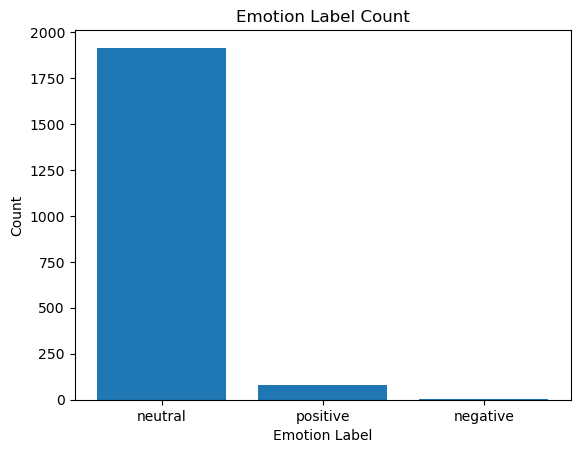

In [34]:
# Plot the bar graph
import matplotlib.pyplot as plt
emotion_counts = df['segmentation'].value_counts()
plt.bar(emotion_counts.index, emotion_counts.values)
plt.xlabel('Emotion Label')
plt.ylabel('Count')
plt.title('Emotion Label Count')
plt.show()

In [11]:
# Top three positive tweets
df.sort_values(by=['polarity'],ascending=False).head(3)

,Unnamed: 0,Text,Cleanedtweets,polarity,subjectivity,segmentation
1594,1595,@Erdayastronaut Impressive,Impressive,1.0,1.0,positive
978,979,@lexfridman Nice,Nice,0.6,1.0,positive
1017,1018,@Carrenimfa Interesting,Interesting,0.5,0.5,positive


In [12]:
# Top three nagative tweets
df.sort_values(by=['polarity'],ascending=True).head(3)

,Unnamed: 0,Text,Cleanedtweets,polarity,subjectivity,segmentation
852,853,@flcnhvy @NASASpaceflight @Erdayastronaut Minor,Minor,-0.05,0.20,negative
417,418,@OLHZN Minor,Minor,-0.05,0.20,negative
741,742,@PPathole Strange,Strange,-0.05,0.15,negative


In [13]:
# Top three neutral tweets
df[df['polarity']==0].head(3)

,Unnamed: 0,Text,Cleanedtweets,polarity,subjectivity,segmentation
0,1,@kunalb11 Im an alien,Imanalien,0.0,0.0,neutral
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,_AA_CarmackRaytracingonCyberpunkwithHDRisnext-...,0.0,0.0,neutral
2,3,@joerogan @Spotify Great interview!,Greatinterview!,0.0,0.0,neutral


# Text Preprocessing 

In [14]:
book = df.iloc[:,2:3]
book

,Cleanedtweets
0,Imanalien
1,_AA_CarmackRaytracingonCyberpunkwithHDRisnext-...
2,Greatinterview!
3,Dogeisunderestimated
4,CongratulationsTeslaChinaforamazingexecutionla...
...,...
1994,"True,itsoundssosurreal,butthenegativepropagand..."
1995,Makesuretoreadurterms&amp;conditionsbeforeclic...
1996,SamwiseGamgee
1997,AlthoDumbandDumberis<U+0001F525><U+0001F525>


In [15]:
book = [x.strip() for x in book.Cleanedtweets] # remove both the leading and the trailing characters
book = [x for x in book if x] # removes empty strings, because they are considered in Python as False
book[0:10]


['I\x92manalien',
 '_AA_CarmackRaytracingonCyberpunkwithHDRisnext-level.Haveyoutriedit?',
 'Greatinterview!',
 'Dogeisunderestimated',
 'CongratulationsTeslaChinaforamazingexecutionlastyear.Nowontothenextforevenmore!!',
 'HappyNewYearoftheOx!https://t.co/9WFKMYu2oj',
 'Frodowastheunderdoge,Allthoughthewouldfail,Himselfmostofall.https://t.co/zGxJFDzzrM',
 '_Hahathanks:)',
 'Indeed!Tweetsdefinitelydonotrepresentreal-worldtimeallocation.',
 'Themostentertainingoutcomeisthemostlikely']

In [16]:
# Joining the list into one string/text
text = ' '.join(book)
text

'I\x92manalien _AA_CarmackRaytracingonCyberpunkwithHDRisnext-level.Haveyoutriedit? Greatinterview! Dogeisunderestimated CongratulationsTeslaChinaforamazingexecutionlastyear.Nowontothenextforevenmore!! HappyNewYearoftheOx!https://t.co/9WFKMYu2oj Frodowastheunderdoge,Allthoughthewouldfail,Himselfmostofall.https://t.co/zGxJFDzzrM _Hahathanks:) Indeed!Tweetsdefinitelydonotrepresentreal-worldtimeallocation. Themostentertainingoutcomeisthemostlikely Justsentsome JustagreetodoClubhousewith https://t.co/3rWE9uHSTS It\x92sgettingreal BoughtsomeDogecoinforlilX,sohecanbetoddlerhodler Hedefinitelyhasissues,butthesentencingseemsbithigh Thanksforfixing Pleaseunlockmyaccount <U+0001F923><U+0001F923> Thisistruepowerhahahttps://t.co/Fc9uhQSd7O Anycryptowalletthatwon\x92tgiveyouyourprivatekeysshouldbeavoidedatallcosts Yourappsucks RT:NASAhasselectedFalconHeavytolaunchthefirsttwoelementsofthelunarGatewaytogetherononemission!https://t.co/3pWt Yes _Oncewecanpredictcashflowreasonablywell,StarlinkwillIPO _St

In [17]:
#Punctuation
import string
no_punc_text = text.translate(str.maketrans('', '', string.punctuation)) #with arguments (x, y, z) where 'x' and 'y'
# must be equal-length strings and characters in 'x'
# are replaced by characters in 'y'. 'z'
# is a string (string.punctuation here)
no_punc_text

'I\x92manalien AACarmackRaytracingonCyberpunkwithHDRisnextlevelHaveyoutriedit Greatinterview Dogeisunderestimated CongratulationsTeslaChinaforamazingexecutionlastyearNowontothenextforevenmore HappyNewYearoftheOxhttpstco9WFKMYu2oj FrodowastheunderdogeAllthoughthewouldfailHimselfmostofallhttpstcozGxJFDzzrM Hahathanks IndeedTweetsdefinitelydonotrepresentrealworldtimeallocation Themostentertainingoutcomeisthemostlikely Justsentsome JustagreetodoClubhousewith httpstco3rWE9uHSTS It\x92sgettingreal BoughtsomeDogecoinforlilXsohecanbetoddlerhodler Hedefinitelyhasissuesbutthesentencingseemsbithigh Thanksforfixing Pleaseunlockmyaccount U0001F923U0001F923 ThisistruepowerhahahttpstcoFc9uhQSd7O Anycryptowalletthatwon\x92tgiveyouyourprivatekeysshouldbeavoidedatallcosts Yourappsucks RTNASAhasselectedFalconHeavytolaunchthefirsttwoelementsofthelunarGatewaytogetherononemissionhttpstco3pWt Yes OncewecanpredictcashflowreasonablywellStarlinkwillIPO Starlinkisstaggeringlydifficulttechnicalampeconomicendeavor

In [18]:
#Tokenization
from nltk.tokenize import word_tokenize
text_tokens = word_tokenize(no_punc_text)
print(text_tokens[0:50])
len(text_tokens)

['I\x92manalien', 'AACarmackRaytracingonCyberpunkwithHDRisnextlevelHaveyoutriedit', 'Greatinterview', 'Dogeisunderestimated', 'CongratulationsTeslaChinaforamazingexecutionlastyearNowontothenextforevenmore', 'HappyNewYearoftheOxhttpstco9WFKMYu2oj', 'FrodowastheunderdogeAllthoughthewouldfailHimselfmostofallhttpstcozGxJFDzzrM', 'Hahathanks', 'IndeedTweetsdefinitelydonotrepresentrealworldtimeallocation', 'Themostentertainingoutcomeisthemostlikely', 'Justsentsome', 'JustagreetodoClubhousewith', 'httpstco3rWE9uHSTS', 'It\x92sgettingreal', 'BoughtsomeDogecoinforlilXsohecanbetoddlerhodler', 'Hedefinitelyhasissuesbutthesentencingseemsbithigh', 'Thanksforfixing', 'Pleaseunlockmyaccount', 'U0001F923U0001F923', 'ThisistruepowerhahahttpstcoFc9uhQSd7O', 'Anycryptowalletthatwon\x92tgiveyouyourprivatekeysshouldbeavoidedatallcosts', 'Yourappsucks', 'RTNASAhasselectedFalconHeavytolaunchthefirsttwoelementsofthelunarGatewaytogetherononemissionhttpstco3pWt', 'Yes', 'OncewecanpredictcashflowreasonablywellSt

1993

In [19]:
#Noramalize the data
lower_words = [x.lower() for x in text_tokens]
print(lower_words[0:25])

['i\x92manalien', 'aacarmackraytracingoncyberpunkwithhdrisnextlevelhaveyoutriedit', 'greatinterview', 'dogeisunderestimated', 'congratulationsteslachinaforamazingexecutionlastyearnowontothenextforevenmore', 'happynewyearoftheoxhttpstco9wfkmyu2oj', 'frodowastheunderdogeallthoughthewouldfailhimselfmostofallhttpstcozgxjfdzzrm', 'hahathanks', 'indeedtweetsdefinitelydonotrepresentrealworldtimeallocation', 'themostentertainingoutcomeisthemostlikely', 'justsentsome', 'justagreetodoclubhousewith', 'httpstco3rwe9uhsts', 'it\x92sgettingreal', 'boughtsomedogecoinforlilxsohecanbetoddlerhodler', 'hedefinitelyhasissuesbutthesentencingseemsbithigh', 'thanksforfixing', 'pleaseunlockmyaccount', 'u0001f923u0001f923', 'thisistruepowerhahahttpstcofc9uhqsd7o', 'anycryptowalletthatwon\x92tgiveyouyourprivatekeysshouldbeavoidedatallcosts', 'yourappsucks', 'rtnasahasselectedfalconheavytolaunchthefirsttwoelementsofthelunargatewaytogetherononemissionhttpstco3pwt', 'yes', 'oncewecanpredictcashflowreasonablywellst

In [20]:
#Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in lower_words]
print(stemmed_tokens[0:40])
len(stemmed_tokens)

['i\x92manalien', 'aacarmackraytracingoncyberpunkwithhdrisnextlevelhaveyoutriedit', 'greatinterview', 'dogeisunderestim', 'congratulationsteslachinaforamazingexecutionlastyearnowontothenextforevenmor', 'happynewyearoftheoxhttpstco9wfkmyu2oj', 'frodowastheunderdogeallthoughthewouldfailhimselfmostofallhttpstcozgxjfdzzrm', 'hahathank', 'indeedtweetsdefinitelydonotrepresentrealworldtimealloc', 'themostentertainingoutcomeisthemostlik', 'justsentsom', 'justagreetodoclubhousewith', 'httpstco3rwe9uhst', 'it\x92sgettingr', 'boughtsomedogecoinforlilxsohecanbetoddlerhodl', 'hedefinitelyhasissuesbutthesentencingseemsbithigh', 'thanksforfix', 'pleaseunlockmyaccount', 'u0001f923u0001f923', 'thisistruepowerhahahttpstcofc9uhqsd7o', 'anycryptowalletthatwon\x92tgiveyouyourprivatekeysshouldbeavoidedatallcost', 'yourappsuck', 'rtnasahasselectedfalconheavytolaunchthefirsttwoelementsofthelunargatewaytogetherononemissionhttpstco3pwt', 'ye', 'oncewecanpredictcashflowreasonablywellstarlinkwillipo', 'starlinkis

1993

In [21]:
import spacy
# NLP english language model of spacy library
nlp = spacy.load('en_core_web_sm') 
nlp

In [22]:
# lemmas being one of them, but mostly POS, which will follow later
doc = nlp(' '.join(stemmed_tokens))
print(doc[0:40])

imanalien aacarmackraytracingoncyberpunkwithhdrisnextlevelhaveyoutriedit greatinterview dogeisunderestim congratulationsteslachinaforamazingexecutionlastyearnowontothenextforevenmor happynewyearoftheoxhttpstco9wfkmyu2oj frodowastheunderdogeallthoughthewouldfailhimselfmostofallhttpstcozgxjfdzzrm hahathank indeedtweetsdefinitelydonotrepresentrealworldtimealloc themostentertainingoutcomeisthemostlik justsentsom justagreetodoclubhousewith httpstco3rwe9uhst itsgettingr boughtsomedogecoinforlilxsohecanbetoddlerhodl hedefinitelyhasissuesbutthesentencingseemsbithigh thanksforfix pleaseunlockmyaccount u0001f923u0001f923 thisistruepowerhahahttpstcofc9uhqsd7o anycryptowalletthatwontgiveyouyourprivatekeysshouldbeavoidedatallcost yourappsuck rtnasahasselectedfalconheavytolaunchthefirsttwoelementsofthelunargatewaytogetherononemissionhttpstco3pwt ye oncewecanpredictcashflowreasonablywellstarlinkwillipo starlinkisstaggeringlydifficulttechnicalampeconomicendeavorhoweverifwedonhttpstco9z8ac6skqx spac

In [23]:
lemmas = [token.lemma_ for token in doc]
print(lemmas[0:25])
len(lemmas)

['i\x92manalien', 'aacarmackraytracingoncyberpunkwithhdrisnextlevelhaveyoutriedit', 'greatinterview', 'dogeisunderestim', 'congratulationsteslachinaforamazingexecutionlastyearnowontothenextforevenmor', 'happynewyearoftheoxhttpstco9wfkmyu2oj', 'frodowastheunderdogeallthoughthewouldfailhimselfmostofallhttpstcozgxjfdzzrm', 'hahathank', 'indeedtweetsdefinitelydonotrepresentrealworldtimealloc', 'themostentertainingoutcomeisthemostlik', 'justsentsom', 'justagreetodoclubhousewith', 'httpstco3rwe9uhst', 'it\x92sgettingr', 'boughtsomedogecoinforlilxsohecanbetoddlerhodl', 'hedefinitelyhasissuesbutthesentencingseemsbithigh', 'thanksforfix', 'pleaseunlockmyaccount', 'u0001f923u0001f923', 'thisistruepowerhahahttpstcofc9uhqsd7o', 'anycryptowalletthatwon\x92tgiveyouyourprivatekeysshouldbeavoidedatallcost', 'yourappsuck', 'rtnasahasselectedfalconheavytolaunchthefirsttwoelementsofthelunargatewaytogetherononemissionhttpstco3pwt', 'ye', 'oncewecanpredictcashflowreasonablywellstarlinkwillipo']


2012

In [24]:
# Feature Extraction
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(lemmas)

In [25]:
print(vectorizer.get_feature_names_out()[50:100])
print(X.toarray()[50:100])

['aacarmackyup'
 'about2secsafterstartingenginesmartytecoveringconcretebelowshatteredsendingbladesofhttpstcovilv1s16yo'
 'above50likelytomakeit' 'absolut' 'absolutelybutitdoesn'
 'absolutelylonglastingartisincrediblydifficult'
 'absolutelyproductiontestingofrocketenginesisover90ofhttpstcotv3pixzp4i'
 'absolutelytheyrocku0001f5a4' 'absolutelyu0001f603u0001f3dd'
 'absolutelywewillreleasefsdsubscriptionearlynextyear'
 'absolutelywillbetextampvisualizationbutcouldaddvoicetoo' 'accur'
 'accurateanalysisquitefewegointelligencegtgt1peopleinyourcommentthreadhahaneithermobileyehttpstcofdligohk01'
 'acquisitionofsignalexpectedin5min' 'actuallyit'
 'adagioforstringsisgreathttpstcorgy1p1vg'
 'addictednoampnotpossibleatthisscal' 'addingpeopleinnextver'
 'additivemanufacturingofpartsisstillfartoocostlyforcarsbutcanrapidlycreatetoolingtoaccelhttpstcoz9kxjt9umj'
 'adritherearesubtleimportantdifferencesbetweenusampcanadatrafficrulesbuhttpstcoxzx9ppvl92'
 'adriy' 'afewmonth' 'afewmorerevisionsneededprob

In [26]:
print(X.toarray().shape)

(2012, 2131)


In [27]:
# bigram and trigram

vectorizer_ngram_range=CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=(100))
bow_matrix_ngram = vectorizer_ngram_range.fit_transform(df["Cleanedtweets"])

In [28]:
bow_matrix_ngram 

<1999x100 sparse matrix of type '<class 'numpy.int64'>'
	with 1930 stored elements in Compressed Sparse Row format>

In [29]:
print(vectorizer_ngram_range.get_feature_names_out())
print(bow_matrix_ngram.toarray())

['0001f1e9' '0001f1e9 0001f1ea' '0001f1ea' '0001f3b6' '0001f440'
 '0001f44d' '0001f495' '0001f4af' '0001f525' '0001f525 0001f525'
 '0001f5a4' '0001f600' '0001f609' '0001f622' '0001f680' '0001f923'
 '0001f923 0001f923' '0432' '0435' '043b' '043e' '043e 043b' '20' '200d'
 '2192' '2192 https' '2192 https co' '263a' '2660' '2660 fe0f' '2665'
 '2665 fe0f' '26a1' '26a1 fe0f' '_williams' 'absolutely' 'agreed' 'also'
 'amp' 'buhttps' 'buhttps co' 'but' 'butit' 'butwe' 'can' 'co'
 'comingsoon' 'completingspacex' 'cool' 'doesn' 'doge' 'don' 'exactly'
 'falcon9' 'fe0f' 'forsure' 'goodpoint' 'gt' 'haha' 'hahatrue' 'hopefully'
 'https' 'https co' 'indeed' 'it' 'liftoff' 'liftoff https'
 'liftoff https co' 'long' 'lt' 'no' 'ok' 'prettymuch' 'rt' 'rt falcon9'
 'rt https' 'rt https co' 'rt liftoff' 'rt liftoff https' 'rt news'
 'rt_crew' 'shttps' 'shttps co' 'sigh' 'sorry' 'spacex' 'sure'
 'technically' 'term' 'thanks' 'that' 'there' 'they' 'true' 'we' 'well'
 'wow' 'yeah' 'yes' 'yup']
[[0 0 0 ... 0 0

In [30]:
# TFidf vectorizer 

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_n_gram_max_features = TfidfVectorizer(norm="l2",analyzer='word', ngram_range=(1,3), max_features = 500)
tf_idf_matrix_n_gram_max_features =vectorizer_n_gram_max_features.fit_transform(book)
print(vectorizer_n_gram_max_features.get_feature_names_out())
print(tf_idf_matrix_n_gram_max_features.toarray())

['000' '0001f1e6' '0001f1e8' '0001f1e8 0001f1e6' '0001f1e9'
 '0001f1e9 0001f1ea' '0001f1ea' '0001f339' '0001f3a9' '0001f3af'
 '0001f3b6' '0001f3b7' '0001f409' '0001f40d' '0001f40d 0001f3b7'
 '0001f440' '0001f44c' '0001f44d' '0001f495' '0001f495 0001f495'
 '0001f4a8' '0001f4a9' '0001f4ab' '0001f4af' '0001f4b0' '0001f525'
 '0001f525 0001f525' '0001f54a' '0001f5a4' '0001f5a4 https'
 '0001f5a4 https co' '0001f600' '0001f603' '0001f609' '0001f622'
 '0001f62c' '0001f680' '0001f917' '0001f918' '0001f923'
 '0001f923 0001f923' '0001f9db' '0001f9db 200d' '0001f9db 200d 2640'
 '000ft' '041a' '041a 043e' '041a 043e 0440' '0432' '0435' '0435 043b'
 '043b' '043c' '043d' '043e' '043e 043b' '043e 0440' '043e 0440 043e'
 '0440' '0440 043e' '0440 043e 043b' '044b' '095whx44bxhttps'
 '095whx44bxhttps co' '100' '20' '200d' '200d 2640' '200d 2640 fe0f'
 '2192' '2192 https' '2192 https co' '263a' '263a fe0f' '2640' '2640 fe0f'
 '2660' '2660 fe0f' '2660 fe0f 2660' '2665' '2665 fe0f' '26a1' '26a1 fe0f'
 '26a1

In [31]:
# Generate wordcloud
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

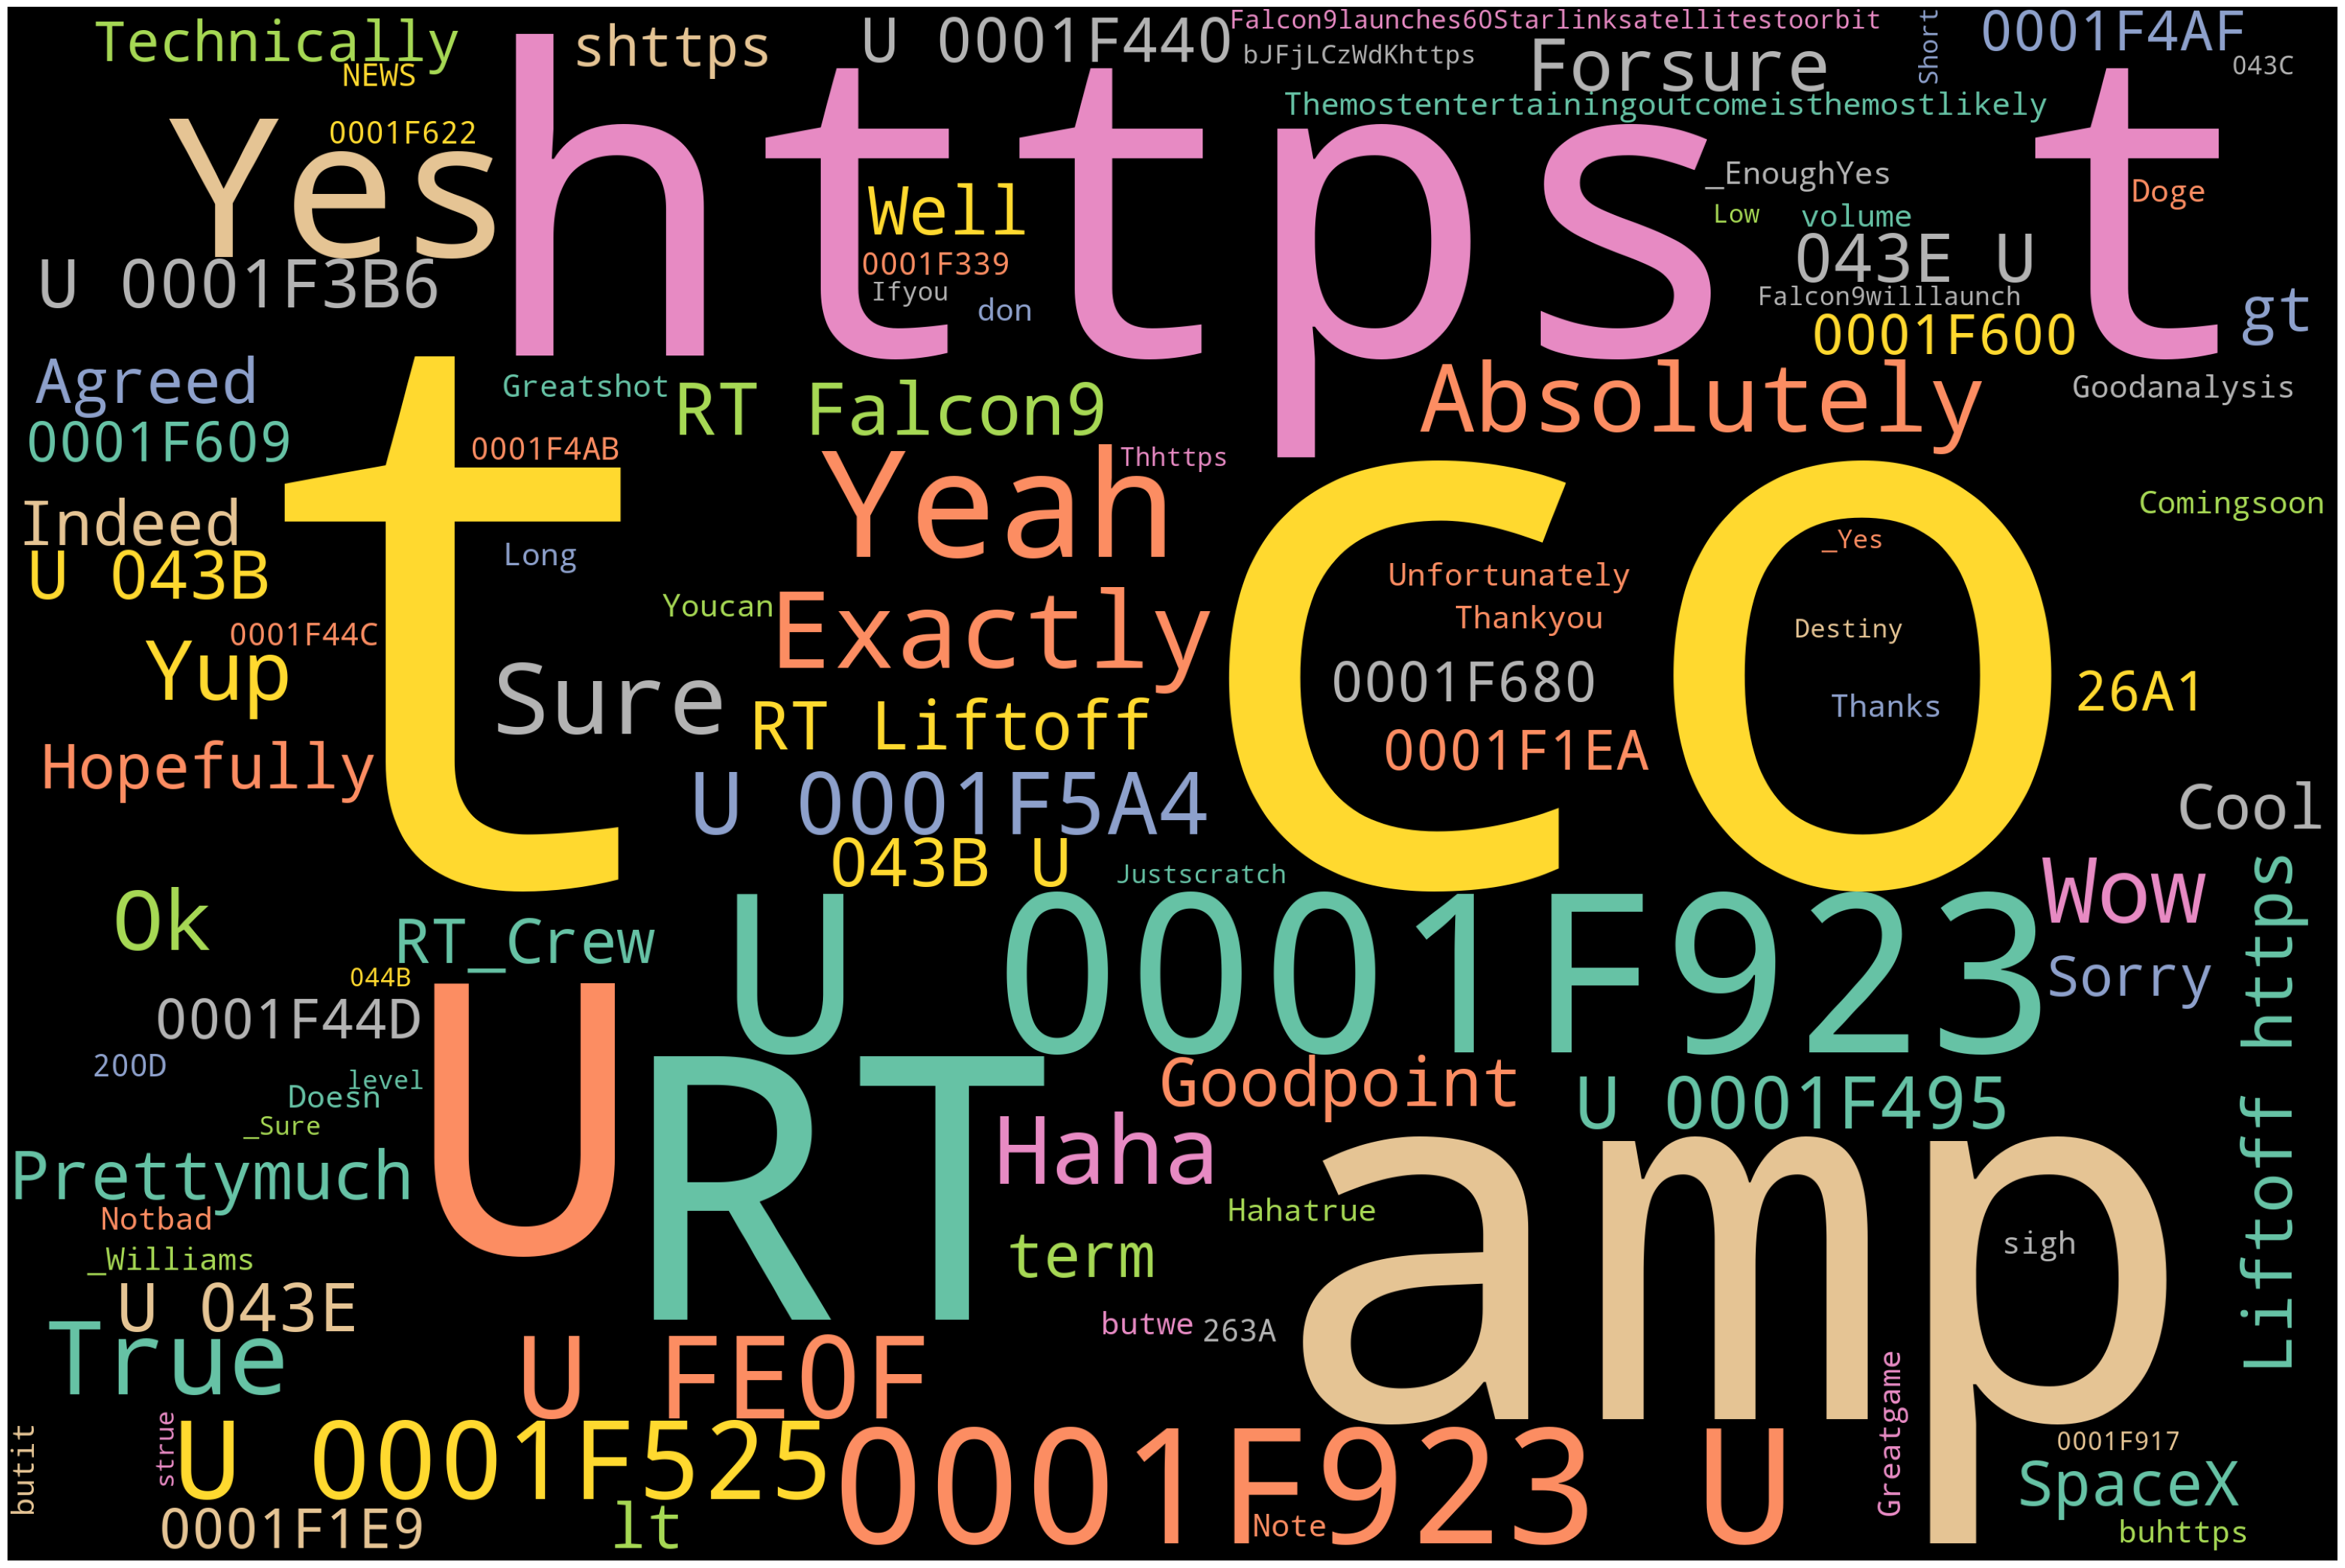

In [32]:
# Generate wordcloud
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(text)
# Plot
plot_cloud(wordcloud)

In [33]:
# Save image
#wordcloud.to_file("wordcloud.png")